In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [9]:
data.isnull().sum() #Age, Cabin have too much null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> In train data, how many Survived?

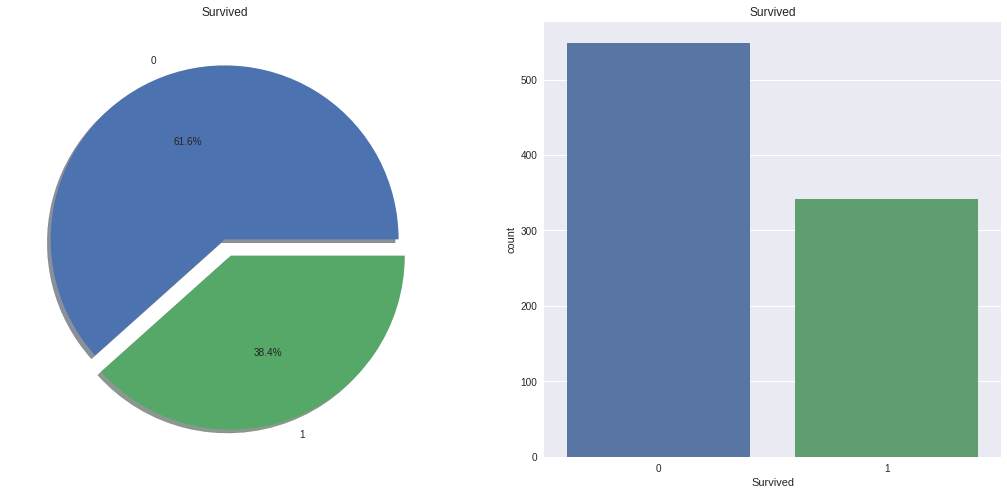

In [10]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%',
                                        ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#data['Survived'].value_counts().plot.bar(ax = ax[1])
sns.countplot(data = data, x = 'Survived')
ax[1].set_title('Survived')
plt.show()

In train data set, 38.4% of people survived.

Dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

To check the survival rate, Use the different features of the dataset

Fist understand the different types of features

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Types of Features

1. Categorical Features:
    A categorical variable is one that has two or more categories and each value
    in that feature can be categoriesed by them. For example, gender is a 
    categorical variable having two categories. Now we cannot sort or give any ordering to such variables.
    They are also known as Nominal Variables.
    -> Sex, Embarked
2. Ordinal Features:
    An ordinal variable is similar to categorical values, but the difference between
    them is that we can have relative ordering or sorting between the values.
    For example, pclass is a ordinal variable that have relative sort in the variable.
    -> Pclass
3. Continous Feature:
    A feature is said to be continuous if it can take values between any two points or
    between the minimum or maximum values in the features column.
    -> Age


# Analysis about Features

1. ### Sex -> Categorical Feature

In train data, we can group Sex and Survived

### visualization

In [12]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

The number of men on the ship is lot more than the number of women.
Still the number of women saved is almost twice the number of males saved.


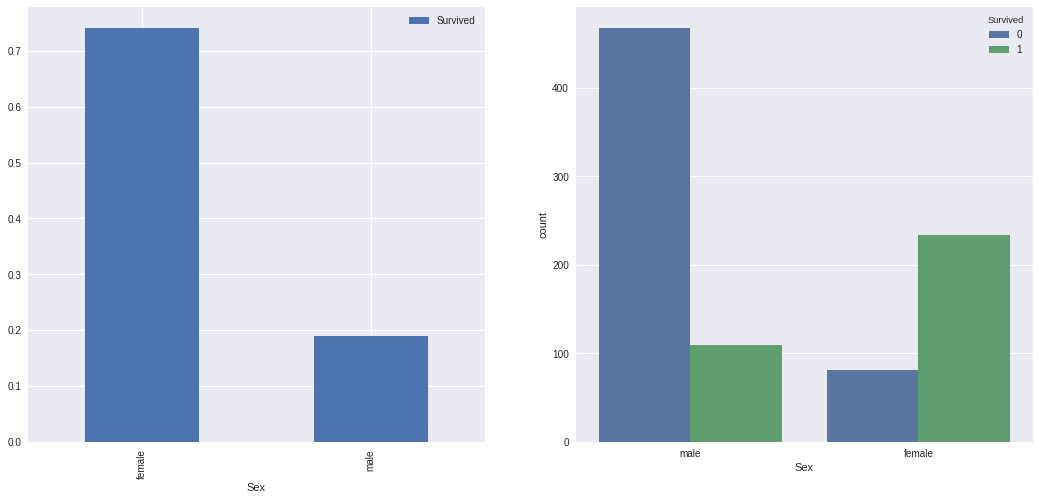

In [13]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot(data = data, x = 'Sex', hue = 'Survived')

The survival rates for a women on the ship os around 75% while that for men in around 18-19%.
This loos to be a very important feature for modeling.

But is it best?
Umm.. I don't know. Lets check other features.

Pclass -> Ordinary Feature

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
pd.crosstab(data['Pclass'], data['Survived'], margins = True).style.background_gradient(cmap = 'Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


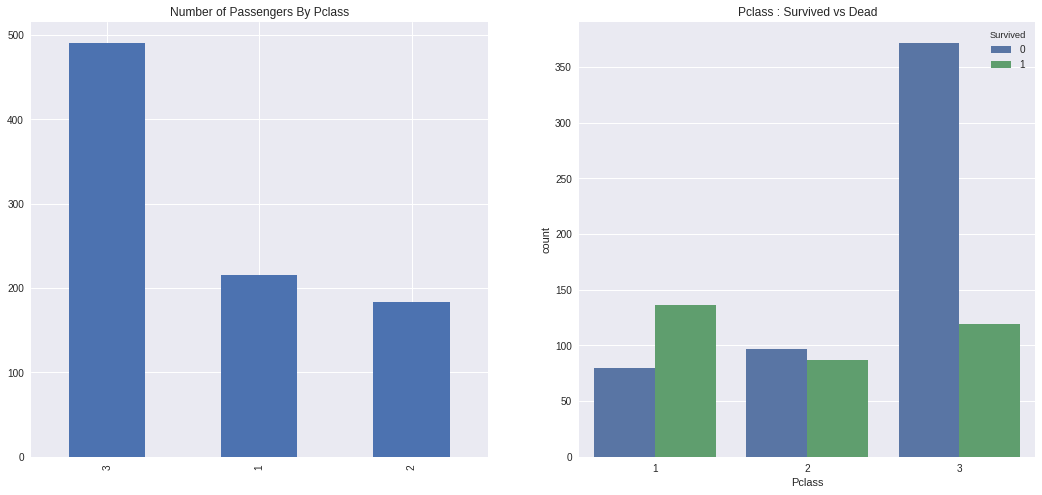

In [16]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot(data = data, x = 'Pclass',hue = 'Survived')
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

<Figure size 1296x720 with 0 Axes>

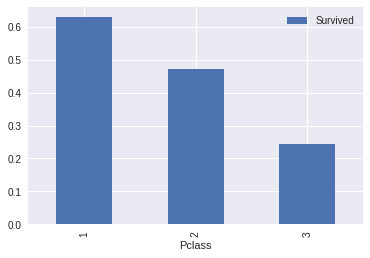

In [17]:
plt.figure(figsize = (18,10))
pd.DataFrame(data[['Pclass','Survived']].groupby(['Pclass']).sum()/data[['Pclass','Survived']].groupby(['Pclass']).count()).plot.bar()

People say Money cannot Buy Everything. But we can cleary see that passengers of Pclass 1 were given a very high priority while rescure.
Even though the number of passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 is survived around 63% while for Pclass 2 is survived around 48%. So money and status matters. Such a materialistic world.

Check Survive & Sex

In [18]:
pd.crosstab([data['Sex'], data['Survived']],data['Pclass'],margins = True).style.background_gradient(cmap = 'Blues')

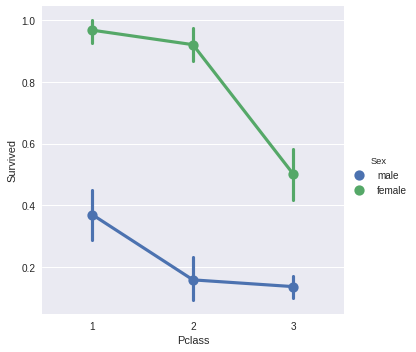

In [19]:
sns.factorplot(data = data, x = 'Pclass', y = 'Survived', hue = 'Sex')
plt.show()

We use FactorPlot in this case. Because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95 - 96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

Ages -> Continuous Feature

In [20]:
data[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Text(0.5, 1.0, 'Pclass and Age vs Survived')

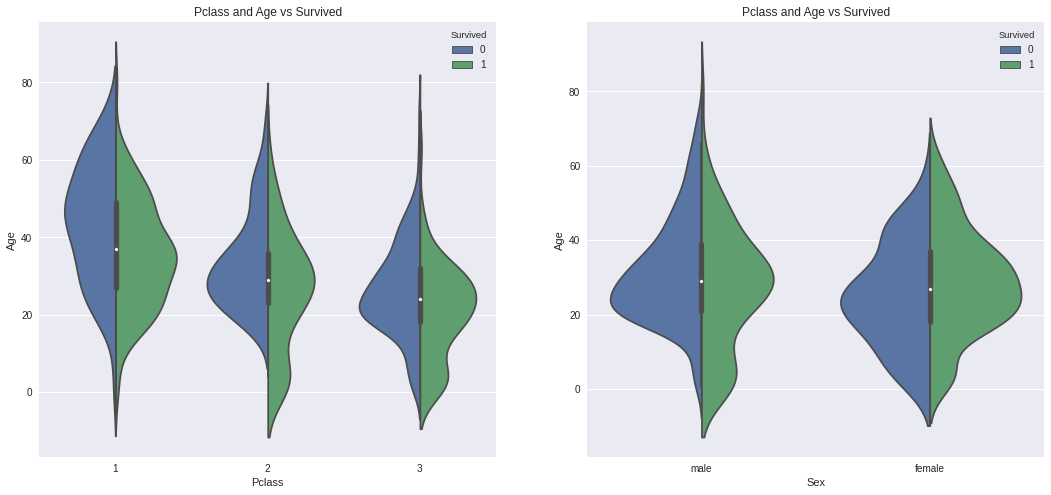

In [21]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass','Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot(data = data, x = 'Sex',y = 'Age',split = True, hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass and Age vs Survived')

1. The number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.

2. Survival chances for passengers aged 25-50 from Pclass1 is hight and is even better for Women.

3. For males, the survival chances decreases with an increase in age.

We has 177 null values in Age feature. To replace these  NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many diffferent ages. So we just cannot assign a 4 year kid with the mean age that is 29 years.

There is a way to find out what age-band does the passenger lie. We can check the Name feature. We can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

Name -> Feature

In [22]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Using Regex:[A-Za-z]+\.
So what it does is, it looks for string which lie between A-Z or a-z and followed by a.(dot). So we successfully extract the initials from the Name.

In [23]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [24]:
pd.crosstab(data.Initial,data.Sex).style.background_gradient(cmap='Blues')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Mme           1
Countess      1
Don           1
Jonkheer      1
Sir           1
Capt          1
Ms            1
Name: Initial, dtype: int64

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [28]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [29]:
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'),'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'),'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'),'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'),'Age'] = 22

In [30]:
data['Age'].isnull().sum()

0

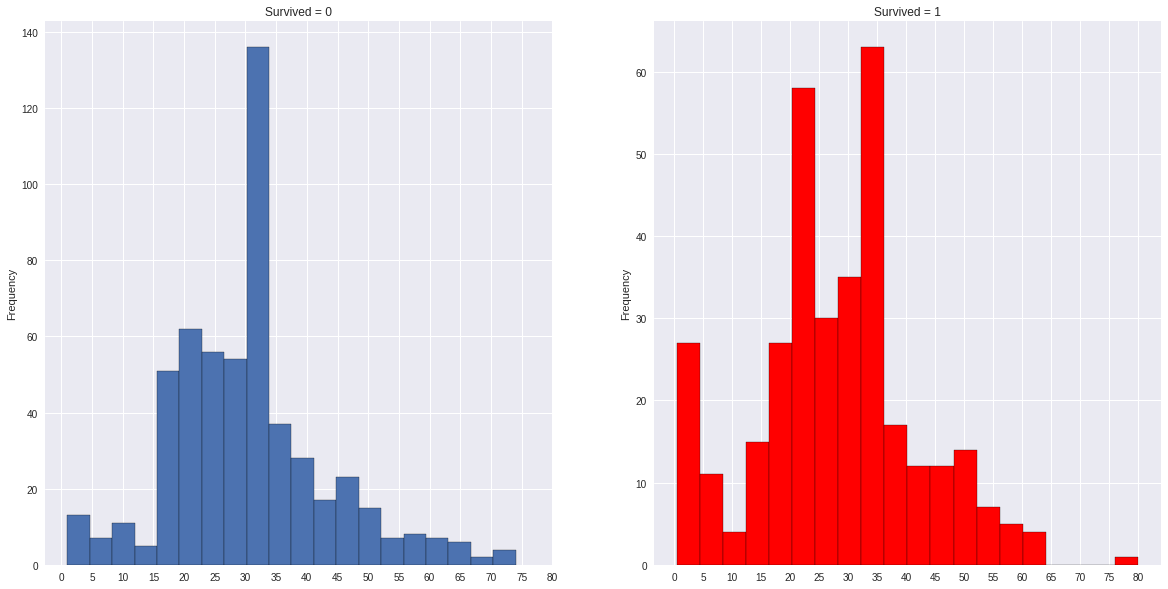

In [31]:
#1.Survived = 0 hist // 2. Survived = 1 hist
f, ax = plt.subplots(1,2, figsize = (20,10))
data.loc[data['Survived'] == 0,'Age'].plot.hist(bins = 20,edgecolor = 'black', ax = ax[0])
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0,85,5))
data.loc[data['Survived'] == 1, 'Age'].plot.hist(bins = 20, edgecolor = 'black',color = 'red', ax = ax[1])
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))

1. The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
2. The oldest Passenger was saved.
3. Maximum number of deaths were in the age group of 30 - 40.

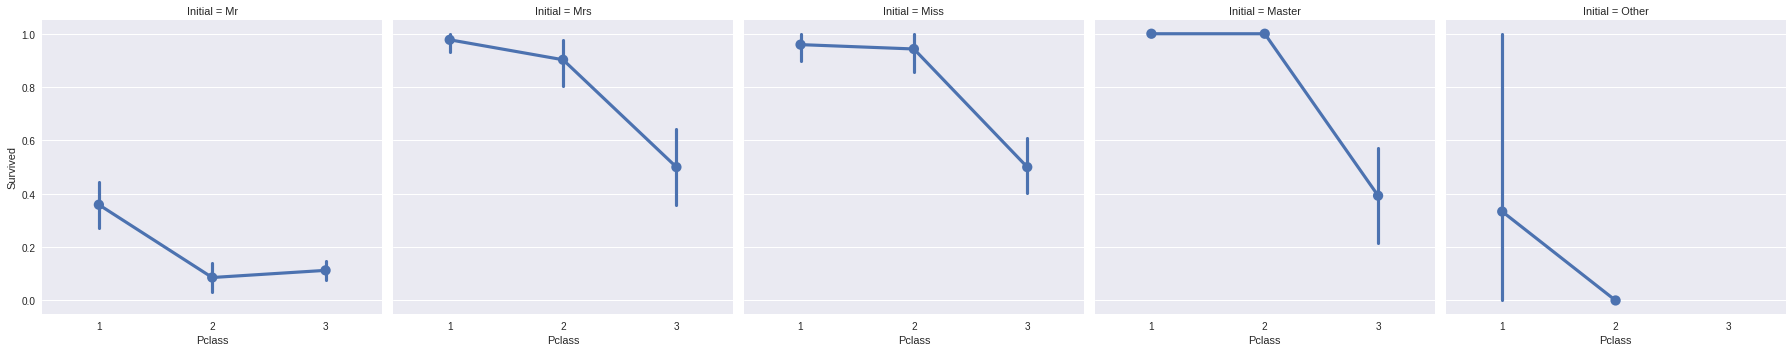

In [32]:
plt.figsize = (18,18)
sns.factorplot(data = data, x = 'Pclass',y = 'Survived', col = 'Initial')

The Women and Child first policy thus holds true irrespective of the class

### Embarked -> Categorical Value

In [33]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins = True).style.background_gradient(cmap = 'Blues')

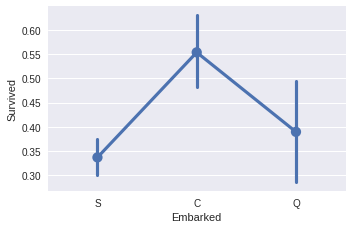

In [34]:
sns.factorplot(data = data, x = 'Embarked',y = 'Survived')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Text(0.5, 1.0, 'Embarked vs Pclass')

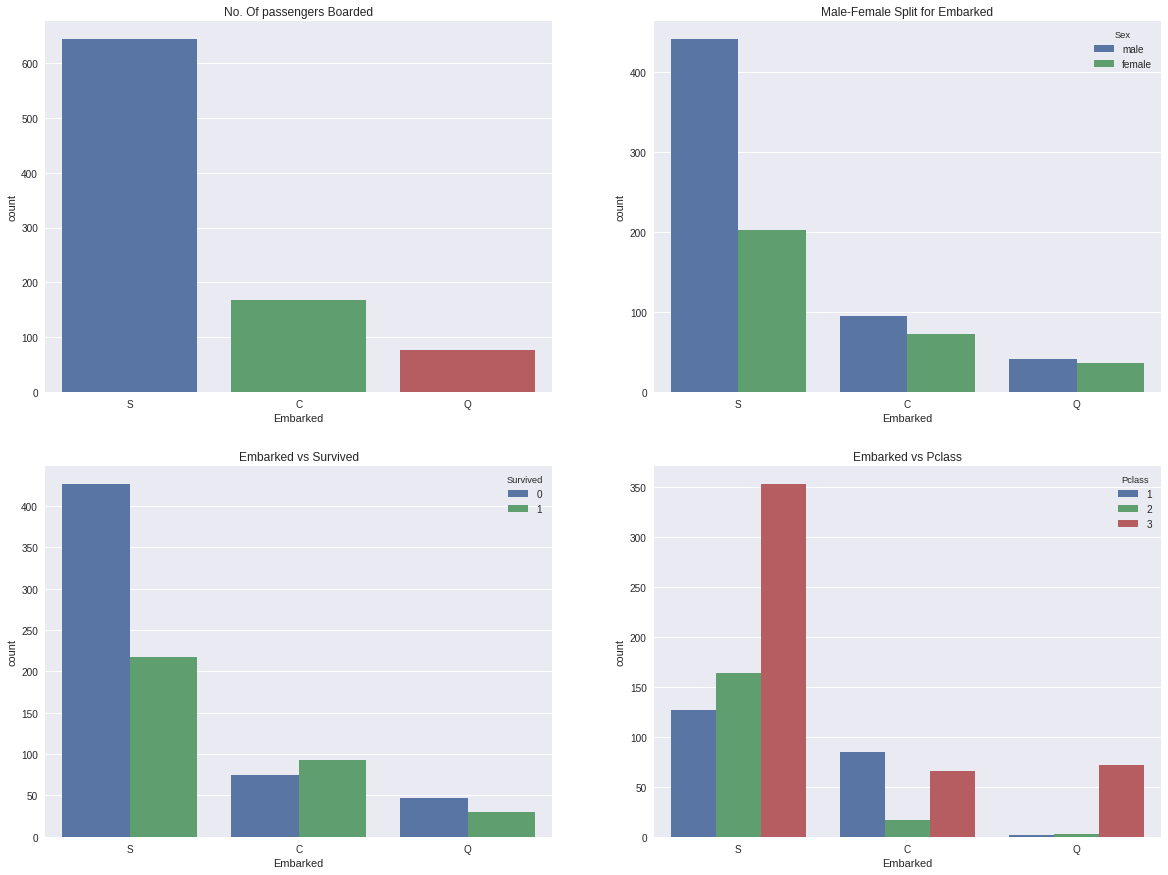

In [35]:
f,ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot(data = data, x = 'Embarked', ax = ax[0,0])
ax[0,0].set_title('No. Of passengers Boarded')
sns.countplot(data = data, x = 'Embarked', hue = 'Sex', ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data = data, x = 'Embarked', hue = 'Survived', ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(data = data, x = 'Embarked', hue = 'Pclass', ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

### Observations:

1. Maximum passengers boarded from S. Majority of them being from Pclass 3.
2. The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescure of all the Pclass1 and Pclass Passengers.
3. The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here that is because many passengers from Pclass3 around 81% didn't survived
4. Port Q had almost 95% of the passengers were from Pclass3.

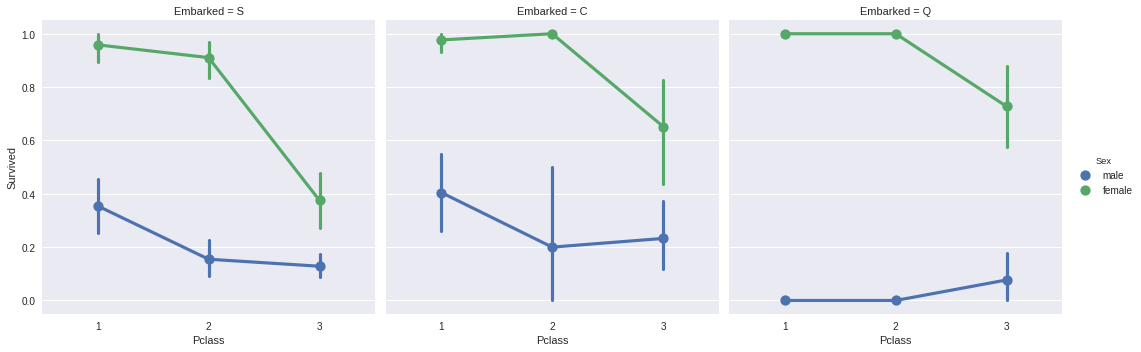

In [36]:
sns.factorplot(data = data, x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked')

### Observations:

1. The survival chances are almost 1 for women for Pclass1 and Pclass2.

2. Port S looks to be very unlucky for Pclass 3 Passengers as the survival rate for both men and women is very low.(Money Matters)

3. Port Q looks to be unlukiest for men, as almost all were from Pclass 3.

Filling Embarked NaN

In [37]:
data['Embarked'].isnull().sum()

2

We know that maximum passengers boarded from Prot S, we replace NaN with S

In [39]:
data['Embarked'].fillna('S',inplace = True)

In [40]:
data['Embarked'].isnull().sum()

0

### SibSp -> Discrete Feature
This feature represents whether a person is alone or with his family memebers

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [41]:
data['SibSp'].isnull().sum()

0

In [42]:
pd.crosstab(data['SibSp'],data['Survived']).style.background_gradient(cmap = 'Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


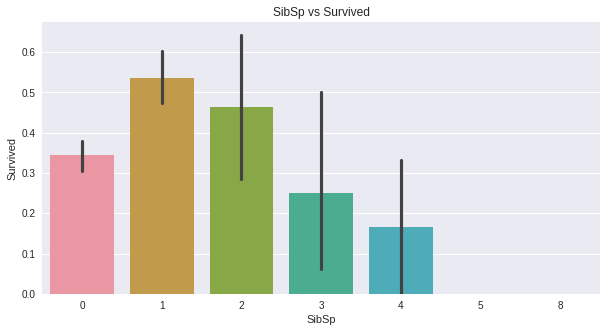

In [43]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'SibSp', y = 'Survived', data = data)
plt.title('SibSp vs Survived')
plt.show()

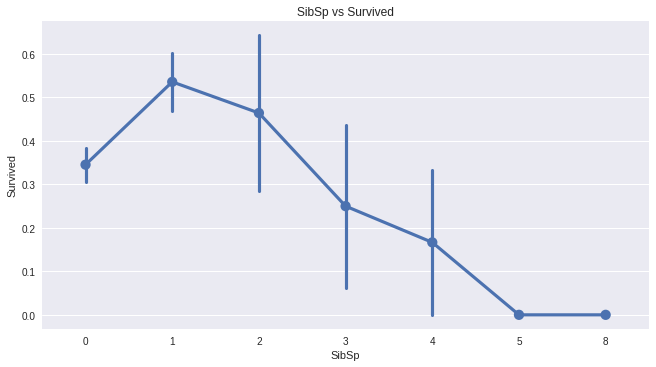

In [44]:
sns.factorplot(x = 'SibSp', y = 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('SibSp vs Survived')
plt.show()

In [45]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap = 'Blues')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:
The barplot and factorplot show that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the nuber of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?

The reason is Pclass. The crosstab shows that Person with SibSp > 3 were all in Pclass 3. It is imminent that all the large families in Pclass3 died

### Parch

In [46]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap = 'Blues')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


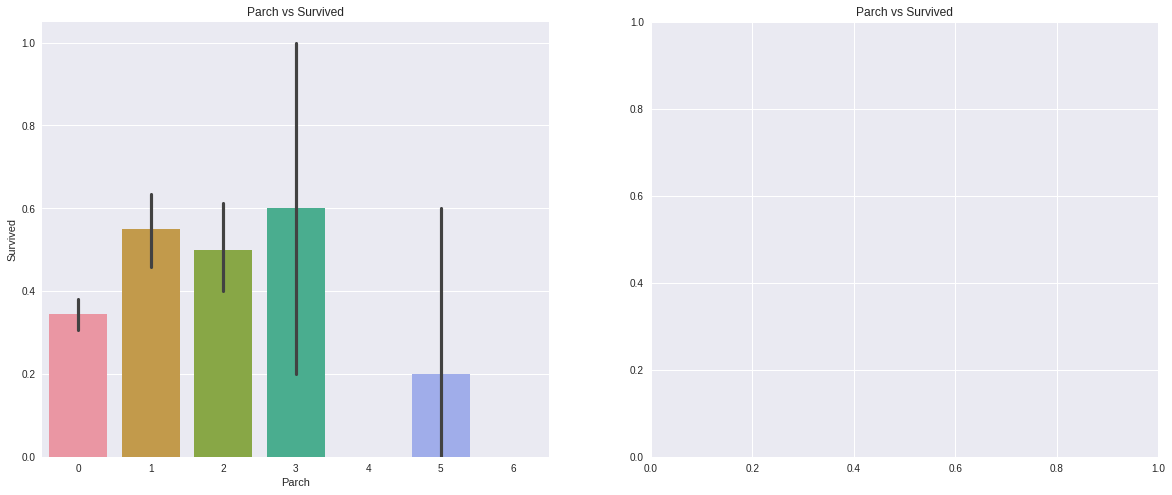

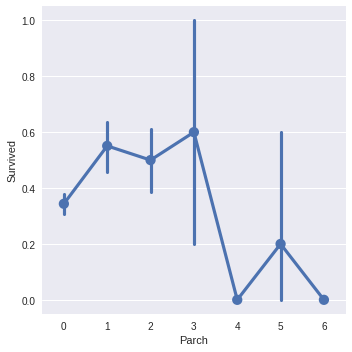

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data = data,x = 'Parch',y = 'Survived',ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot(data = data, x = 'Parch',y = 'Survived',ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

### Observations:
Here two the results are quite similar. Passengers with their family onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has > 4 family on the ship

### Fare -> Continuous Feature

In [48]:
pd.DataFrame(data['Fare'].describe()).drop('count')

,Fare
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


Min is 0.

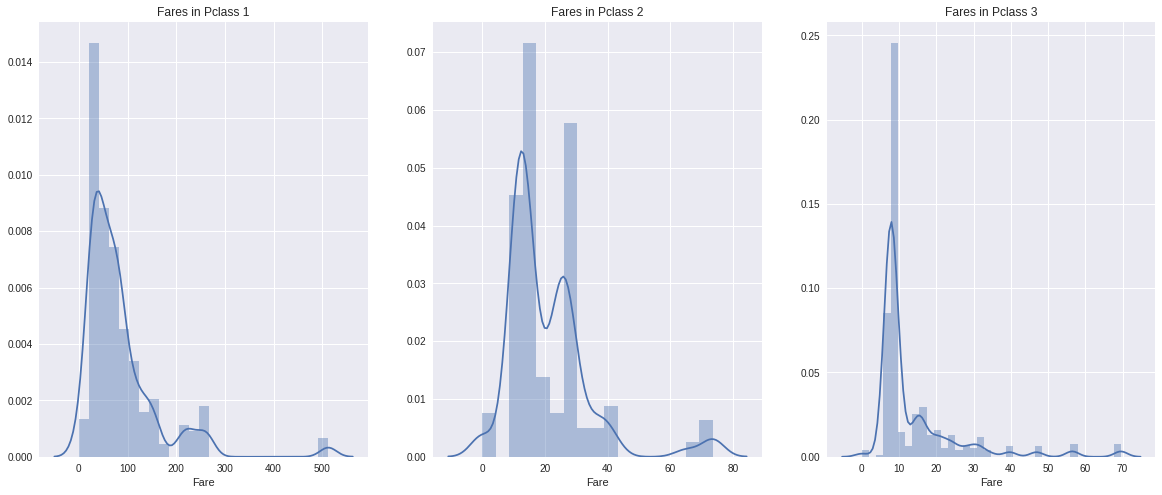

In [49]:
f, ax = plt.subplots(1,3,figsize = (20,8))
for i in range(3):
    sns.distplot(data[data['Pclass'] == i+1]['Fare'], ax = ax[i])
    title = 'Fares in Pclass' + " " + str(i + 1)
    ax[i].set_title(title)

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces.
As this tis also continuous, we can convert into discrete values by using binning.

## Observations in a Nutshell for all features:

Sex : The chance of survival for women is high as compared to men.

Pclass : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!.

Age : Children less than 5-10 years do have a high chances of survival. Passengers between age group 15 to 35 died a lot.

Embarked : This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass 3.

Parch & SibSp : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family traveling with you.

## Correlation Between the Feature

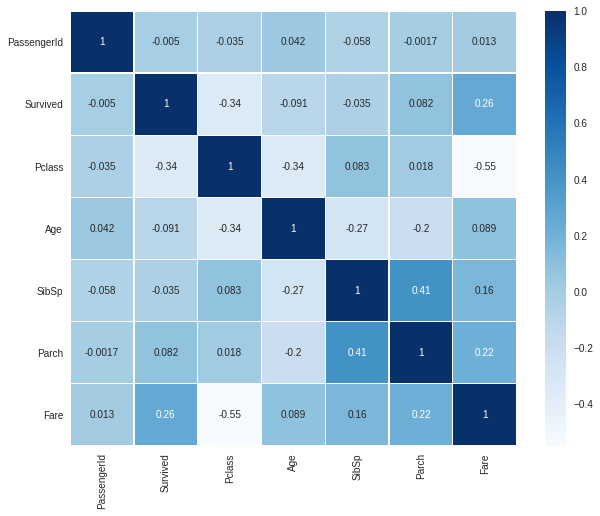

In [50]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**Positive Correlation**

If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**Negative Correlation**

If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

    
    
Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between SibSp and Parchi 0.41. So we can carry on with all features.

## Feature Engineering and Data Cleaning

What is Feature Engineering?

whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we get or add new features by observing or extracting information from other features.

An example would be getting the initials feature using the Name Feature. Lets fee if we can get any new features and eliminate a few. Also we will transfrm the existing relevant features to suitable form for Predictive Modeling.

### Age_band

#### Problem with Age Featrue

As I have mentioned earlier that Age is a continuous feature, there is a problem with Continuous Variables in Machine Learning Models.

Eg: If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continuous values into categorical values by eighter **Binning** or **Normalisation**. I will be using binning i.e group a range of ages into a single bin or assing them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5 = 16. So bins of size 16.

In [66]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data[['Age','Age_band']].head(2)

,Age,Age_band
0,22.0,1
1,38.0,2


In [67]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'Blues')

,Age_band
1,382
2,325
0,104
3,69
4,11


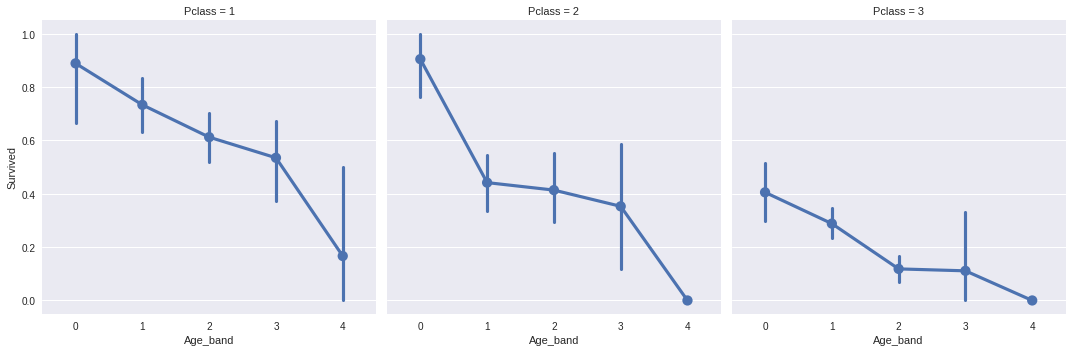

In [68]:
sns.factorplot(data = data, x = 'Age_band',y = 'Survived', col = 'Pclass')
plt.show()

The survival rate decreases as the age increases irrespective of the Pclass.

### Family Size and Alone

At this point, we can create a new feature called 'Family_size' and 'Alone' and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passangers. Alone will denote whether a passenger is alone or not.

In [70]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0,'Alone'] = 1

Text(0.5, 1.0, 'Family_Size vs Survived')

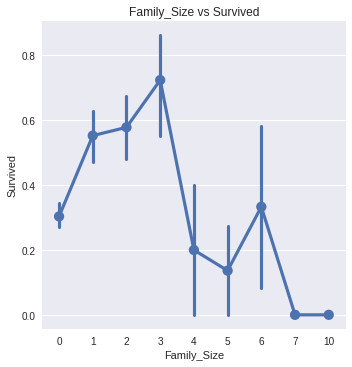

In [74]:
sns.factorplot(data = data, x = 'Family_Size', y = 'Survived')
plt.title('Family_Size vs Survived')

Text(0.5, 1.0, 'Alone vs Survived')

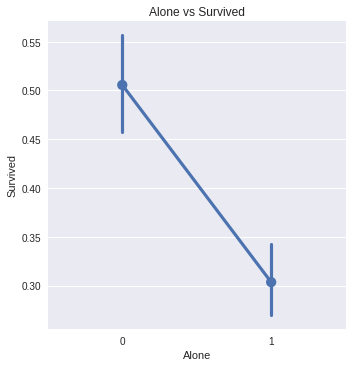

In [75]:
sns.factorplot(data = data, x = 'Alone', y = 'Survived')
plt.title('Alone vs Survived')

Family_Size = 0 means that the passanger is alone. Cleary, if you are alone or family_size = 0, then chances for survival is very low. For family size>4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

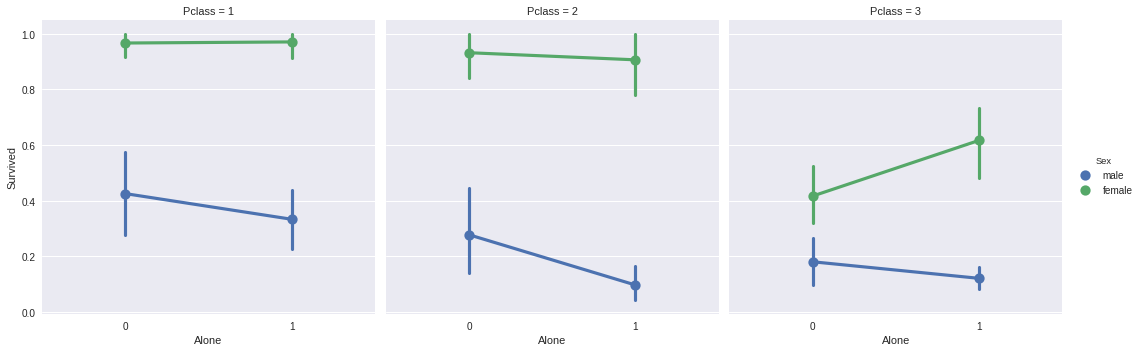

In [76]:
sns.factorplot('Alone','Survived',data = data, hue = 'Sex', col = 'Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range

Since fare is also a continuous feature, we need to convert it into ordival value. For this we will use **qcut**.

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 4 bins, it will arrange the values equally spaced into 4 seperate bins or value ranges.

In [80]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'Blues')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed about, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band.

In [83]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

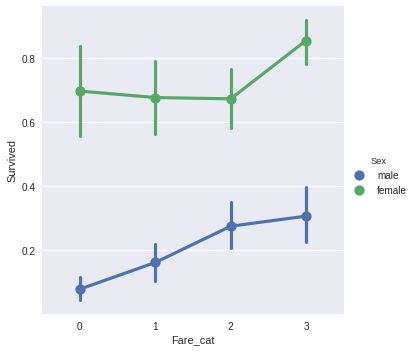

In [87]:
sns.factorplot(data = data, x = 'Fare_cat', y = 'Survived', hue = 'Sex')

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values

In [96]:
data['Sex'].replace(['male','female'],[0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

### Dropping UnNeeded Features

Name -> We don't need name feature as it cannot be converted into any categorical value.

Ticket -> It is any random string that cannot be categories.

Fare -> We have the Fare_cat feature, so unneeded.

Cabin -> A lot of NaN values and also many passengers have multiple cabins. 
So this is a useless feature.

Fare_Range -> We have the fare_cat feature.

Passengerld -> Cannot be categorised

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis = 1,
         inplace = True)


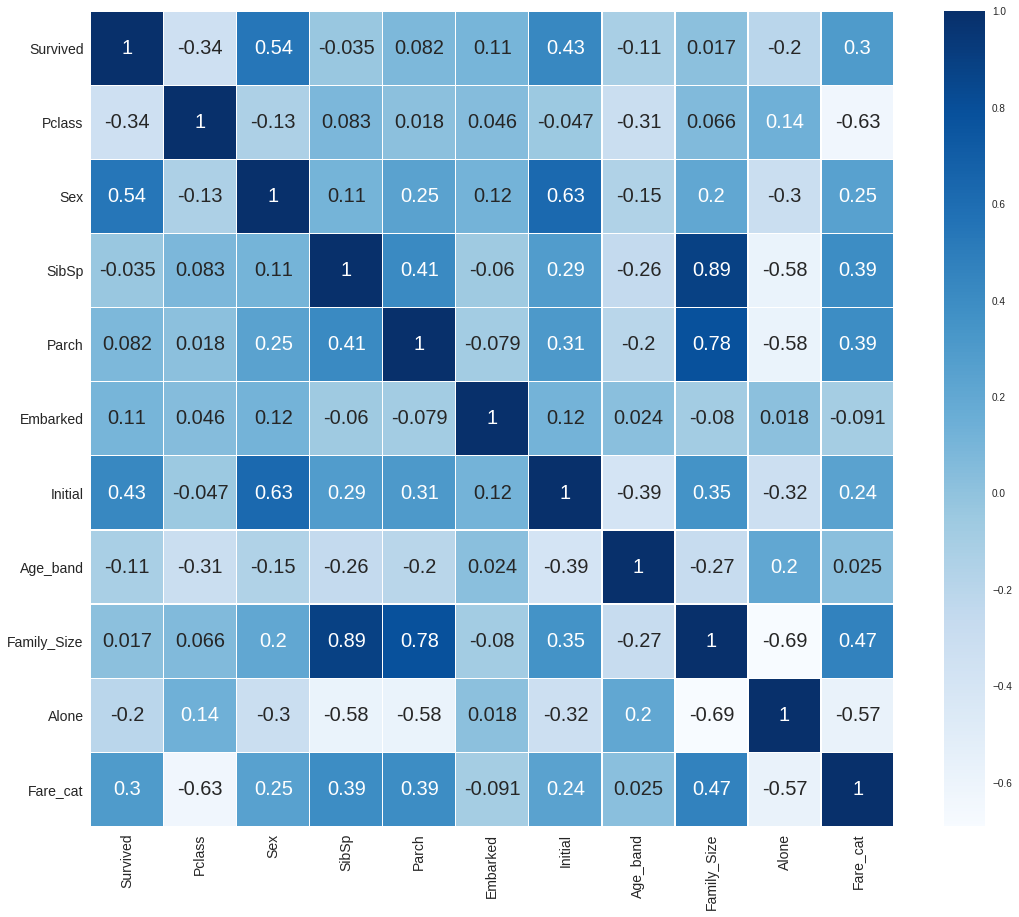

In [101]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths = 0.2, annot_kws = {'size' :20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Now the above correlation plot, we can see some positively related features.
Some of them being SibSp and Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

## Predictive Modeling

we have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithems. Following are the algorithms I woll use to make the model:

1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbors
5. Naive Bayes
6. Decision Tree

In [103]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [105]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

In [106]:
train, test = train_test_split(data, test_size = 0.3,
                               random_state = 0, stratify = data['Survived'])
tratify = data['Survived']
train_X = train[train.columns[1:]]
train_Y = train[train.columns[0]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[0]]
X = data[data.columns[1:]]
Y = data[data.columns[0]]

### Radial Support Vector Machines(rbf-SVM)

In [107]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

NameError: name 'prediction1' is not defined